In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv("C:/Users/fr5424/Data/Kaggle/Blackfriday_pred/Dataset/Train.csv", encoding='ISO-8859-1')
test = pd.read_csv("C:/Users/fr5424/Data/Kaggle/Blackfriday_pred/Dataset/Test.csv",encoding='ISO-8859-1')

train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [3]:
print(train.shape)
print(test.shape)

(87020, 26)
(37717, 24)


In [4]:
test.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
0,ID000026A10,Male,Dehradun,21500,03-Apr-87,05-May-15,100000.0,3.0,0.0,APTARA INC,...,100000.0,3.0,20.0,1000.0,2649.39,N,Web-browser,B,S122,3
1,ID000054C40,Male,Mumbai,42000,12-May-80,01-May-15,0.0,0.0,0.0,ATUL LTD,...,690000.0,5.0,24.0,13800.0,19849.90,Y,Mobile,C,S133,5
2,ID000066O10,Female,Jaipur,10000,19-Sep-89,01-May-15,300000.0,2.0,0.0,SHAREKHAN PVT LTD,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,1
3,ID000110G00,Female,Chennai,14650,15-Aug-91,01-May-15,0.0,0.0,0.0,MAERSK GLOBAL SERVICE CENTRES,...,NaN,NaN,NaN,NaN,NaN,N,Mobile,C,S133,1
4,ID000113J30,Male,Chennai,23400,22-Jul-87,01-May-15,100000.0,1.0,5000.0,SCHAWK,...,100000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S143,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

This gives us the idea about the datatypes and also the missing values in the dataset, but lets see the number of missing values directly. But before doing that, as we will be using the test data for predictions lets combine both the datasets together to work on the Data explorataion, cleaning and preparation part.

In [6]:
#we will add another variable in both the datasets to segregate the datasets later
train['new']= 'train'
test['new'] = 'test'
all_data=pd.concat([train, test],ignore_index=True)
all_data.shape


(124737, 27)

Lets do the univariate analysis of the categorical variables by finding the frequency tables for them

In [7]:
var = ['Gender','City','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print ('\nFrequency count for variable %s'%v)
    print (all_data[v].value_counts())


Frequency count for variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable City
Delhi                  17936
Bengaluru              15522
Mumbai                 15425
Hyderabad              10410
Chennai                 9895
Pune                    7427
Kolkata                 4282
Ahmedabad               2528
Jaipur                  1892
Gurgaon                 1743
Coimbatore              1659
Thane                   1306
Chandigarh              1266
Surat                   1149
Visakhapatnam           1080
Indore                  1051
Vadodara                 893
Nagpur                   879
Lucknow                  813
Ghaziabad                795
Bhopal                   735
Kochi                    692
Patna                    675
Faridabad                651
Noida                    549
Madurai                  534
Gautam Buddha Nagar      485
Dehradun                 444
Raipur                   430
Bhubaneswar              407

Lets do some univariate analysis of the continous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A051B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B8F6390>]], dtype=object)

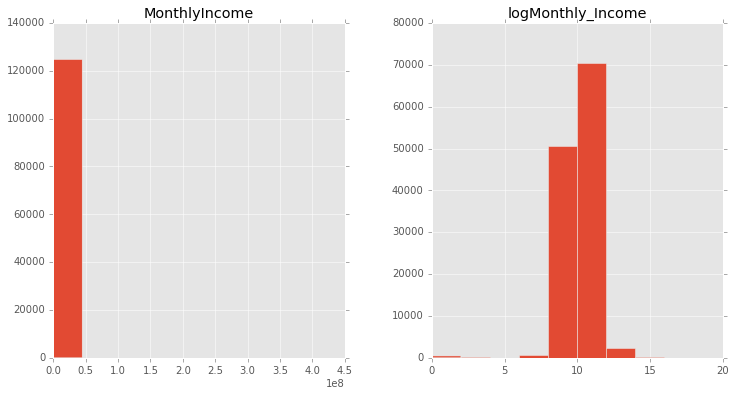

In [8]:
#lets look at the distribution of the Monthly income variable
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 6)

first = pd.DataFrame({"MonthlyIncome" : all_data.Monthly_Income, "logMonthly_Income" : np.log1p(all_data.Monthly_Income)})
first.hist()

Lets drop the city variable as there are too many unique values, as this notebook will mostly concentrate on the Tree modelling part, lets get wuickly done with the data cleaning and data preparation part.

In [9]:
#dropping the city variable

all_data.drop(["City"], axis = 1, inplace = True)

In [10]:
all_data.shape

(124737, 26)

In [11]:
#creating a variable called as age instead of DOB would help us understand the age better

all_data['Age'] = all_data['DOB'].apply(lambda x: 116 - int(x[-2:]))
all_data['Age'].head()

0    38
1    31
2    35
3    29
4    32
Name: Age, dtype: int64

In [12]:
#dropping DOB
all_data.drop(["DOB"], axis = 1, inplace = True)

In [13]:
#As there are many missing values in the variable EMI_Load_submitted we would replace the missing values with 0 and the present values with 1
#Majority values missing so I'll create a new variable stating whether this is missing or note:
all_data['EMI_Loan_Submitted_Missing'] = all_data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
all_data['EMI_Loan_Submitted_Missing'].head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: EMI_Loan_Submitted_Missing, dtype: int64

In [14]:
#dropping the original value

all_data.drop(["EMI_Loan_Submitted"], axis  = 1, inplace = True)

In [15]:
all_data.shape

(124737, 26)

In [16]:
#we would also delete some other variabls which are of no use to the datset and are very hard to handle, you can always find something
#interesting or create new variables if you eant from them
all_data.drop(["Employer_Name"], axis = 1, inplace = True)
all_data.drop(['Interest_Rate'],axis=1,inplace=True)
all_data.drop(['Lead_Creation_Date'],axis=1,inplace=True)
all_data.drop(['LoggedIn'],axis=1,inplace=True)
all_data.drop(['Salary_Account'],axis=1,inplace=True)

In [17]:
#for this Existing_EMI variable we will impute all its missing values with the mode
all_data["Existing_EMI"].fillna("0", inplace = True)

In [18]:
#for loan amount and tenure applied
#Impute with median because only 111 missing:
all_data['Loan_Amount_Applied'].fillna(all_data['Loan_Amount_Applied'].median(),inplace=True)
all_data['Loan_Tenure_Applied'].fillna(all_data['Loan_Tenure_Applied'].median(),inplace=True)

In [19]:
#High proportion missing so create a new var whether present or not
all_data['Loan_Amount_Submitted_Missing'] = all_data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
all_data['Loan_Tenure_Submitted_Missing'] = all_data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [20]:
#Remove old vars
all_data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [21]:
#High proportion missing so create a new var whether present or not
all_data['Processing_Fee_Missing'] = all_data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
all_data.drop(['Processing_Fee'],axis=1,inplace=True)

In [22]:
#for source
all_data['Source'] = all_data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
all_data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

We will LabelEncode those variables who dont have that much of category in them

In [23]:
#Label Encoding certain variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    all_data[col] = le.fit_transform(all_data[col])

In [24]:
#For the rest where the categories are more we will OneHot encode them or use get_dummies metod of Pandas
all_data = pd.get_dummies(all_data, columns=var_to_encode)
all_data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'new', 'Age',
       'EMI_Loan_Submitted_Missing', 'Loan_Amount_Submitted_Missing',
       'Loan_Tenure_Submitted_Missing', 'Processing_Fee_Missing',
       'Device_Type_0', 'Device_Type_1', 'Filled_Form_0', 'Filled_Form_1',
       'Gender_0', 'Gender_1', 'Var1_0', 'Var1_1', 'Var1_2', 'Var1_3',
       'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7', 'Var1_8', 'Var1_9', 'Var1_10',
       'Var1_11', 'Var1_12', 'Var1_13', 'Var1_14', 'Var1_15', 'Var1_16',
       'Var1_17', 'Var1_18', 'Var2_0', 'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4',
       'Var2_5', 'Var2_6', 'Mobile_Verified_0', 'Mobile_Verified_1',
       'Source_0', 'Source_1', 'Source_2'],
      dtype='object')

In [25]:
#lets also find the correlation between all these variables using the Pearson correlation method
threshold = 0.4

size = 13 #size of the numerical values in the dataset

cols= all_data.columns #getting the names of all the columns in the datset 

num_values = all_data.select_dtypes(include = [np.number]) #taking in the numerical values from the dataset

corr_list = []

#finding corelation for the numerical values
num_values_corr = num_values.corr()

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (num_values_corr.iloc[i,j] >= threshold and num_values_corr.iloc[i,j] < 1) or (num_values_corr.iloc[i,j] < 0 and num_values_corr.iloc[i,j] <= -threshold):
            corr_list.append([num_values_corr.iloc[i,j],i,j])
            
#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Loan_Amount_Submitted_Missing and Loan_Tenure_Submitted_Missing = -1.00
Var5 and EMI_Loan_Submitted_Missing = 0.99
Loan_Tenure_Applied and Var5 = -0.68
Loan_Tenure_Applied and EMI_Loan_Submitted_Missing = -0.67
ID and Loan_Amount_Submitted_Missing = -0.63
ID and Loan_Tenure_Submitted_Missing = 0.63
Loan_Tenure_Applied and new = -0.57
Loan_Tenure_Applied and Age = -0.57
Var5 and new = 0.56
Var5 and Age = 0.56
new and EMI_Loan_Submitted_Missing = 0.55
Age and EMI_Loan_Submitted_Missing = 0.55
Existing_EMI and ID = 0.50
Monthly_Income and new = -0.48
Monthly_Income and Age = -0.48


There are signs of multicollinearty in these variables. we need to remove some variables, we can remove them at random or using VFI(Variance Inflation factors). We will remove the var5 at this moment as it does not seem important, but you can always perform the VIF test to select which one to remove.

In [26]:
all_data.drop(["Var5"], axis = 1, inplace = True)

In [27]:
train = all_data.loc[all_data['new']=='train']
test = all_data.loc[all_data['new']=='test']

In [28]:
train.drop('new',axis=1,inplace=True)
test.drop(['new','Disbursed'],axis=1,inplace=True)

C:\Users\fr5424\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\fr5424\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
train.shape, test.shape

((87020, 49), (37717, 48))

As we now have our data which is ready to be put into an algorithm we will now focus on the Tree based algorithms, knowing the working of all of them and understanding the algorithms and the most important part understanding the parameters that are used to build the model. 

# Tree based Modelling

Decision trees are one of the most commonly used Supervised Learning algorithms in the Machine Learning field. They are mostly used for the classification problems where we need to classify the given predictor variables(categorical or continous) to the target variables. But it can be used for Regression(target variable as continous) problems as well.


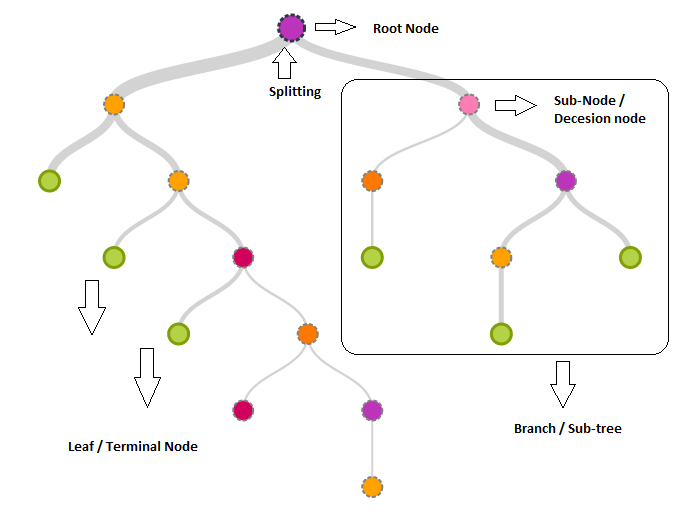

In [30]:
from IPython.display import Image
Image(filename='C:/Users/fr5424/Desktop/traditional.png')

So this is how a Decision tree looks like, where it has the root node(the top most node in the tree) and then it splits on a certain variable from the predictor variables that we have in the dataset on some condition. This process is called "Splitting". If a "sub-node" in the decision tree splits further then it is called as a "Decision Node". The last nodes in the tree are called as "Leafs" or "Terminal nodes".

There is also a very important process called as "Pruning" in the tree modelling which helps us to overcome the biggest problem that these decision trees have which is Overfitting. Pruning is exactly opposite of splitting where we cut the subnodes from the tree which are of no use. This is already implemented in xgboost but for normal decision trees its not yet implemented in python but R has that function in it.

# Example of a small Tree

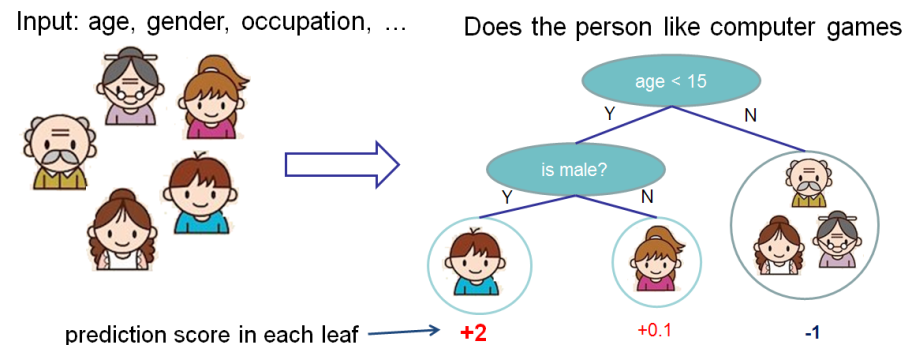

In [31]:
Image(filename='C:/Users/fr5424/Desktop/cart.png')

## Working of a Decision tree:
So in this above example we are given a group of people with certain variables like Ge, GEnder, occupation etc and we want to know who amongst them like to play video games. 

So on the right hand side you can see that we have splitted the Paremt node on the variable "age" (< 15), then in the second level we split our Sub-node according to the variable "Gender" is he is a male or a female. This is how the decision tree works and forms into a big tree by splitting on the variables present in the dataset. So now here the question arises how does the decision tree know on which variable to split on. We will be seeing that using the different algorithms that it uses to do this splitting in the later section. 

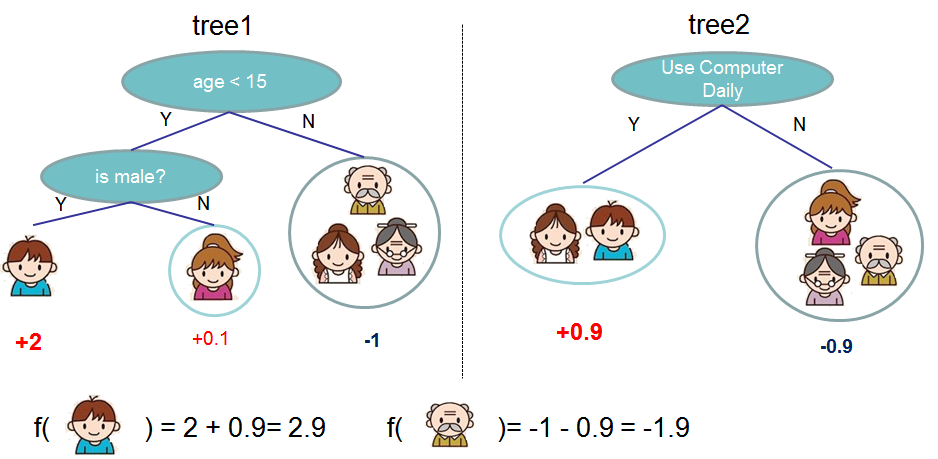

In [32]:
Image(filename= 'C:/Users/fr5424/Desktop/twocart.png')

In this image we see that the there are two subtrees here Tree1 and Tree2. Tree1 is the same in the image above where we have calculated the gain(a form of algorithm that decision tree uses) for every leaf node and in the tree2 we have divided on the variable whether the people use computer or not. Here also we have calculated the gain. Then we merge the gain from both these trees to get a single value. This is a process called as "Ensembling" which we will see in the later section of the notebook.

# Decision trees for Classification and Regression problems

Decision trees are mostly used for classification problems but they can also be used for Regression problems. 

## Classification problems:
Suppose we want to classify a person on whether he is eligible for a loan or not with a bank according to his details present with the bank like Gender, credit card limit, monthly income, no of dependents etc. So here the target variable - Loan_Status is a categorical variabble Yes(1) or No(0) and we are predicting it by building our model on the predictor variables in the dataset which can be Categorical or Continous. This is a perfect example of a Classification problem. 

They are called as Categorical variable Decision trees.

## Regression problems:
Suppose we have a similar case, but now we want to predict the credit limit that the bank should offer to the person according to his details like Gender, monthly_income, no of loans, no of dependents, saving account etc. As the target variable here can take any value 1000 or 15000, as  this the target variable is a continous value we have a Regression problem here. Decesion trees can be used to solve such kind of problems.

Decision trees which solve such kind of problems are called as Continous Variable Decision trees.


Both the Trees here follow the Top-Down approach where we begin from the root and move towards the leaves of the tree. The splitting process in the tree continous till a user defined criteria for stopping is defined. It is also known as a "Greedy Algorithm" because the algorithm cares (looks for best variable available) about only the current split, and not about future splits which will lead to a better tree.

As we have seen the working of a Decision tree, lets look at the Algorithms that it uses to decide the splitting and for the entire working

# Algorithms used by Decision Trees
Splitting on which node and taking in which variable to split is a very important factor which affects the accuracy of the model to a great extent. The decision criteria used by Classification trees and Regression trees is different.

Decision trees can make use of multiple ways to find the best split or the best variable to make the split. The idea behind this splitting is to make a sub node which takes us close with respect to the target variable. They actually split on all variables and select the best one of of them which gives us the best score or create the most homogenous node with respect to the target variable. Thats why the running time/processing time for decision trees is also considerably higher.

An Algorithm should be able to decide how and which Variable should we split and how should this splitting procedure stop.

We will now see some of the most common algorithms used in decision trees

# Hunts Algorithm:
Hunt algorithm forms the basis of many decision trees induction algorithms like ID3, CHAID, CART, C4.5 etc. In Hunt's algorithm the decision tree is grown in a recurssive fashion by partioning the inputs into successively purer subsets. 

Let A be the set of training record associated with a node "t" and y = {y1, y2, y3....yn} be the target variable. 

case1 :So if all the record in A belong to the same class "y" then we call it as the leaf node and assign it as "yt" and we dont split further.

case2: If the record in A dont belong to the same class "y" then we need to select an "attribute test condition" to partition the records into smaller subsets. A child node is created for each outcome of the test condition and records in A are distributed according to the outcome. This is applied recurssively to each and every child node. But in this case many a times it can happen that the records which are distributed to child nodes, some of them may be empty, so to overcome this condition we assign such nodes as Leaf nodes, also in a situation for the records that are split and if a node has all the identical records, then it becomes impossible to split so we assign that node as a leaf node as well.

Q: How do we select the best measures for the best split and the variable.

There are many measures to select the best split, they are defined in terms of class distribution of the records before and after splitting. They are totally based on the degree of impurity in the node. If the node has a an equal distribution of class variable/ target variable then it is totally impure whereas if the distribution is positively or negatively skewed then it is considered to be less impure. To test how well did we split, we need to compare the degree of impurity with the parent before splitting and with the child nodes after splitting, the greater the distance the better is the split.

The measures that we use for the split are
* Gini index
* Entropy
* Missclassification error

## CART Algorithm:
The Classification and Regression Trees algorithm uses the **Gini Index** to perform the best split. It uses this measure to perform the best split or select the best variable to be splitted from the dataset that we have. It only performs binary splits and works with categorical variables - Yes or No. For Regression variable it works differently, we will see the calculation the the coming section. Greater the value of a Gini Index, greater is the purity or homegenity in the node.

## Calculating GINI Index and GINI gain:
Gini, which is an **impurity-based** criterion that measures the divergences betweenthe probability distribution of the target variable. Lets see the definition and the formula for Gini Index and Gini gain.

**Gini index**: Given a training set "D", and the target variable takes on k different values. then Gini index of D is defined as:

 * Gini(D) = 1 -  sumission of all k values from i = 1 to k * (p of i)^2
 where p is the probability of D belonging to class i.
 
 If the class has only one categorical variable than the Gini Index for that variable is 1 - 1 = 0, which is the purest form and if the variable has a normal distribution than the gini index tends to be the maximum.
 
**Gini gain**: Gini gain is calculated by multiplying the Gini for the target variable and multiplying it for every variable according to its categories.

For a clear example and calculation read this paper: https://www.academia.edu/7032069/An_example_of_calculating_gini_gain_in_CART


## C4.5 Algorithm using entropy
Suppose we have to split a Parent node with values "FH", "BH" and "GH" into 3 sub-nodes A, B and C. If A has a pure distribution ie. it has values of only 1 categorical variable "FH" thorought, so we can say it is a pure node. B has some variations with the distributions of "FH and "GH", so we can say its a slightly impure node and C has highly imbalanced values of "FH" and "GH", so we can say that this is the most impure node.

So which node amongst them would require the least information to describe it. It would certainly be node A as it is the most pure node. so **ENTROPY** is the measure to define this degree of disorganization in a system. It defines the Information gain in the system. It is given by the formula:

 * Information Gain =  -p log2p - q log2q
 
 * Information Gain = Entropy(baseline) - Entropy(tree)
 
C4.5 has the ability ot produce more than 2 splits. The way the c4.5 works is it compares the entropy of all the possible trees with the original data (baseline data). Then it chooses the tree with maximum information gain i.e. difference of entropies

Steps to calculate entropy for a split:

Calculate entropy of parent node
Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes available in split.

## CHAID Algorithm
CHAID stands for Chi-square automatic Interator detection. The basic algorithm that is used to construct (non-binary) trees, which for classification problems (when the dependent variable is categorical in nature) relies on the Chi-square test to determine the best next split at each step; for regression-type problems (continuous dependent variable) the program will actually compute F-tests. 

It follows two steps basically:

Preparing Predictors: It prepares the predictor variables for the final test. If the variable is continous it prepares that variable by dividing it into number of categories with approximately equal number of observations. For Categorical variables they are already defined, so its not a problem for the algorithm

Merging: In this step it goes through all the predictors to measure the significance of that variable with the target variable by comparing it to the selected value of p which is normally taken as 0.05. If its lesser than this value it states its statistically significant with target so that variable is selected. So if the variable is a categorical variable it performs a Chi-square test given by the formula :

* Chi-square test = ((Actual - Expected)^2 / Expected)^1/2

and for Continous variables it performs the **f-test**. After splitting as well it keeps on calculating the significance using these two tests, if the value for that particular node goes above the p-value, then that node is considered to be a leaf node.

## Reduction in Variance algorithm
This algorithm is used mostly when the variables in the dataset are Continous variables ie. for Regression problems. This Algorithm uses the standard Variance formula to decide on the best split or the splitting Variable. The variable with the lowest variance is considered for splitting.

* Variance = (X - X')^2 / n, where X' is the mean of all the values and n is the number of values

Steps to calculate Variance:

Calculate variance for each node.
Calculate variance for each split as weighted average of each node variance.


**For better understanding of all these methods please read this paper: https://www-users.cs.umn.edu/~kumar/dmbook/ch4.pdf**
Here the author has described in detail every process with good examples.

As we have seen the algorithms that the Decision tree uses, we will now see some of the advantages and the disadvantages that these trees have which we need to consider while buildig Trees.

# Advantages
* Useful in Selecting Variables: As we perform many statisticall significant test on variables, Decfision trees help us find the most siginificant variable form the dataset, this can surely help us in the Data Exploration part. It tells us directly the most important variables with respect to the target variable.

* Less impacted by missing values and outliers, can deal with them significantly

* CAn handle noth categorical and Regression problems

# Disadvantages
* Overfitting: This is the problem faced by all Tree models as they prone to overfit the data easily. This can be dealt with **Pruning**


As we have seen the Working, the Algorithms involved and also the advantages and disadvantages, we can now open this Decision tree to see what all parameters should we consider while building a Decision tree. These parameters surely affect the overfitting problem of the Decision tree and can help us control it.

# Important Parameters involved
Overfitting being the biggest problem of the Decision trees, we need to find methods to stop it, to control this problem we can simply tune our parameters used in building the Decision trees to avoid overfitting and control the growth of the tree.

Lets look at some of the important parameters I found which are common for in Tree Modelling be it in Python or R.

## Parameters
**Minimum samples for a node split**
* Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
* Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
* Too high values can lead to under-fitting hence, it should be tuned using CV.


**Minimum samples for a terminal node(leaf)**
* Defines the minimum samples (or observations) required in a terminal node or leaf.
* Used to control over-fitting similar to min_samples_split.
* Generally lower values should be chosen for **imbalanced class** problems because the regions in which the minority class will be in majority will be very small.


**Maximum depth of tree (vertical depth)**
* The maximum depth of a tree.
* Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
* Should be tuned using CV.


**Maximum number of terminal nodes**
* The maximum number of terminal nodes or leaves in a tree.
* Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.


**Maximum features to consider for split**
* The number of features to consider while searching for a best split. These will be randomly selected.
* As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
* Higher values can lead to over-fitting but depends on case to case.

As we have completed the part for the Decision Trees, lets further move on to the other ALgorithms of Tree modeliing which are more powerful than CART and can help us with the Bias-Variance trade off as well.

# RandomForest
Random Forest is a type of ensemble learning method, which combines the result from different trees in the forest to give you the final output. It can perform both Classification and Regression tasks, for classification it takes the mode from the Leaf nodes and in Regression it takes the mean from the leaf nodes. Random Forest can also handle various Data exploration steps like Outlier values, missing values, feature importance which can help us in dimensionality reduction as well. In all it is an algorithm which can be used in any problem.

## Working of the Algorithm
Random Forest works very smartly by building different trees on the same data and then ensembling their performance. It selects samples from the data with different variables, with same number of observations but with replacements and builds a tree on these selected random variables. It works like a bootstrapping algorithm with the CART model capabilities, basically building many CART trees to form a Forest. We will understand this better with an example. 

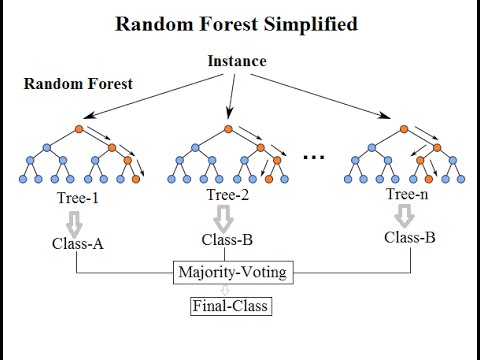

In [33]:
Image(filename= 'C:/Users/fr5424/Desktop/hqdefault.jpg')

## Example
So in this above example lets assume that there are about 50 variables with 50000 observations. So what Random Forest will do is it will randomly select a certain set of variables randomly from the dataset. In this picture suppose the Algorithm chooses first 30 variables to train the Tree-1, then it will also choose variables from 20 - 50 ie 30 variables for the Tree-2, and different set of 30 variables for Tree-3. The number of variables selected for the different trees remain the same but with replacement. This selection of number of random variables is always less than the number of input variables. Then they act as a normal CART tree with selecting the best variable to split and finding its splitting conditon.

All these different trees are grown to their maximum depth and the the aggregation or the ensembling of the output is done to predict the final outcome of the new data(majority voting is taken for classification and averaging is done for Regression).

In the above example if between the 3 trees, Tree-2 and Tree-3 say its Class-B so we will classify our new input according to Class-B

AS we now know the working of the algorithm lets see some of the parameters that are used to build the Random Forest which can also prove to improve the performance of the model, its accuracy and its run time.

## Important Parameters
To improve the Predictive power of the Model and also to train it easily we can tune some parameters, I have listed some important parameters, but you can always have a look at the parameters on the scikit learn website 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**max_features**
It tells us the number of features to be considered while splitting a node in an individual tree. There are many options availbale for this which you can check on the scikit learn website

* Auto/None : This will take all the features in every tree. There are no restrictions on the individual tree.
* sqrt : This option will take square root of the total number of features in individual run. 
* 0.5 : This option allows the random forest to take 50% of variables in individual run. 

Increasing the number of features for splitting surely increases the predictive power of the model but decreases the speed of the model to a great extent

**min_sample_leaf_size**
* This usually is used for overfitting as we have seen it in the decision trees as well. A smaller leaf size is not recommended but should be between 40 - 60 normally, but trying different leaf sizes is a very good practise during the cross validation of the model.

**n_estimators**
* This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

**n_jobs**
* This parameter tells the number of processors we can use to run our algorithm. n_jobs = 1 is the default value but you can choose any integer value for it. n_jobs = -1 tells the computer to make use of all the processors for the algorithm.

**random_state**
* This makes the solution reproducable. If you always want the same split of numbers you can assign it to a certain number so that everytime the solution is the same for all the users. This should not be used in the production environment.

**oob_score**
* This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.

**bootstrap**
* This is a boolean parameter which when True tells us that bootstrap samples will be used. default is True 

## Advantages
* The Algorithm has many other features which are very useful to us in the Data exploration stage like giving us the importance of features from the entire input variables, this helps us in dimensionality reduction.
* It also deals with missing values, outlier very easily
* It is a better and stable model than CART(Decision Trees)
* **Decreases the variance to some extent**
* It can solve both Classification and Regression problems
* Random Forest involves sampling of the input data with replacement called as bootstrap sampling. Here one third of the data is not used for training and can be used to testing. These are called the out of bag samples. Error estimated on these out of bag samples is known as out of bag error. Study of error estimates by Out of bag, gives evidence to show that the out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

## Disadvantages
* works better in case of Classification problems compared to Regression problems

# Gradient Boosting
In this type of modelling we make use of the Boosting technique to give the final putput for the model. Boosting technique is nothing but to convert the weak learners in the system to strong learners. What we do over here is we combine the prediction of each weak learner(tree) to form the final output. The methods that we use to do this are weighted average or consider predictions with highest votes.

## Working of Gradient Boosting
GBM follows 3 steps
* Optimizing the loss function which is defined
* Build weak learners for the algorithm
* Make use of a additive model to add these weak learners together

**Minimizing the loss function**
After you define the loss function as per the specificity of the problem(different in case of Classification and Regression), we need to optimize it. These loss functions have to be differentiable. 

**Building weak learners**
Here weak learners signify Decision trees which make use of CART algorithm to form a decision tree. Trees here are constructed in greedy manner finding the best split. It is always good to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.This is to ensure that the learners remain weak, but can still be constructed in a greedy manner. 

**Using Additive model to add weak learners**
Trees are added one at a time, and existing trees in the model are not changed.A gradient descent procedure is used to minimize the loss when adding trees. Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss. The output for the new tree is then added to the output of the existing sequence of trees in an effort to correct or improve the final output of the model. A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.


Lets understand this model using a simple example. 

Suppose we have a set of data (x1, y1), (x2, y2), (x3, y3)....(xn, yn) and the task is to fit a model to minimize the square loss. Now we build a model F() where we get x1 = 0.8 whereas y1 = 1.1 and x2 = 0.9 and y2 = 1 and so on.... So the question here is how can we improve this model to minimize the errors that we are getting?

But there are some rules which we need to follow to improve the model:

1)we cannot remove anything from the model or change any of the parameter
 
But what we can do here is ask some help from a friend and tell him to build a model H() for me which we can add to our model. So our new equation will be y1 = F(x1) + H(x1).

This can also be written as H(x1) = y1 - F(x1). So the question here is can H(x1) achieve this goal properly, it may achieve this, if we fit a regression function as (x1, y1 − F(x1)),(x2, y2 − F(x2)), ...,(xn, yn − F(xn)).

Thus you have added one more model and also improved your weak learner(model you designed) to an extent. This is how the additive process works of adding models to the previous models without changing anything from them and improving the model.

y1 - F(x1) is called a **residual**. These are the parts that existing model F cannot do well.The role of h is to compensate the shortcoming of existing model F. If the new model F + H is still not satisfactory, we can add another model to it.

So this is hoe the Bossoting algorithms basically work. 

For more refrence you can see this presantation: http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf

## Parameters used in GBM

It uses all the baisc Parameters that we have used in the Decision trees but we will also be seeing some of important and unique parameters for the GBM algorithm

**learning_rate**
* This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
* Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
* Lower values would require higher number of trees to model all the relations and will be computationally expensive.


**n_estimators**
* The number of sequential trees to be modeled (step 2)
* Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.


**subsample**
* The fraction of observations to be selected for each tree. Selection is done by random sampling.
* Values slightly less than 1 make the model robust by reducing the variance.
* Typical values ~0.8 generally work fine but can be fine-tuned further.
* Apart from these, there are certain miscellaneous parameters which affect overall functionality:

**loss**
* It refers to the loss function to be minimized in each split.
* It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.


**init**
* This affects initialization of the output.
* This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.


**random_state**
* The random number seed so that same random numbers are generated every time.
* This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
* It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used


**verbose**
* The type of output to be printed when the model fits. The different values can be:
0: no output generated (default)
1: output generated for trees in certain intervals
1: output generated for all trees


**warm_start**
* This parameter has an interesting application and can help a lot if used judicially.
* Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications presort 
* Select whether to presort data for faster splits.
* It makes the selection automatically by default but it can be changed if needed.

# XGBoost
XGBoost stands for e**X**treme **G**radient **Boost**ing.

It is an algorithm build on the same principles of boosting but with some modifications which help it to improve its performance to some extent. It was created by **Tianki Chen**, the author has given a nice explanation of how is XGBoost different from GBM which you can find here: https://www.quora.com/What-is-the-difference-between-the-R-gbm-gradient-boosting-machine-and-xgboost-extreme-gradient-boosting.

XGBoost is a library in python which can be downloaded and installed on your machine, it is also available in scikit. 

It basically follows the same Boosting technique with some modifications. Lets check out these cool features from XGBoost.

**Regularization**
* Unlike GBM, XGBoost has a inbuilt Regularization property which helps us to avoid overfitting to great extent.
* It has both L1 and L2 from of Regularization.
* It is also known as a Regularized boosting technique.

**Gradient Boosting**
* It also supports the other two forms of Gradient Boosting.
* Gradient Boosting algorithm also called gradient boosting machine including the learning rate.
* Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.

**Parallel Processing**
* It makes use of Paralle computing ie. building trees parallelly on the number of cores because of which it is very fast compared to GBM
* It can also be implemented on **Hadoop eco-system**
* As it supports implementation on Hadoop, it also is used in distributed computing and can handle large datsets with ease.
* Supports cache optimization of data structures and algorithms making best use of the hardware

**High Flexibility**
* XGBoost allow users to define custom optimization objectives and evaluation criteria.
* This adds a whole new dimension to the model and there is no limit to what we can do.


**Handling Missing Values**
* XGBoost has an in-built routine to handle missing values.
* User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.


**Tree Pruning:**
* A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
* XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
* Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.


**Built-in Cross-Validation**
* XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
* This is unlike GBM where we have to run a grid-search and only a limited values can be tested.


**Continue on Existing Model**
* User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.

XGBoost was built to improve the effeciency of the built time thus utilizing the memory resources and the hardware to the best possible limits

XGBoost is the best algorithm while handling complex datasets with because its execution speed is great as it operates parallely on all the cores of the computer, hence it is also the goto algorithm for all the Kaggle winning solutions and is used by all of them.

## Important Parameters

**booster [default=gbtree]**
* Select the type of model to run at each iteration. It has 2 options:
gbtree: tree-based models
gblinear: linear models


**silent [default=0]:**
* Silent mode is activated is set to 1, i.e. no running messages will be printed.
* It’s generally good to keep it 0 as the messages might help in understanding the model.


**nthread [default to maximum number of threads available if not set]**
* This is used for parallel processing and number of cores in the system should be entered
* If you wish to run on all cores, value should not be entered and algorithm will detect automatically

**eta [default=0.3]**
* Analogous to learning rate in GBM
* Makes the model more robust by shrinking the weights on each step
* Typical final values to be used: 0.01-0.2


**min_child_weight [default=1]**
* Defines the minimum sum of weights of all observations required in a child.
* This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
* Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
* Too high values can lead to under-fitting hence, it should be tuned using CV.


**max_depth [default=6]**
* The maximum depth of a tree, same as GBM.
* Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
* Should be tuned using CV.
* Typical values: 3-10


**max_leaf_nodes**
* The maximum number of terminal nodes or leaves in a tree.
* Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
* If this is defined, GBM will ignore max_depth.


**gamma [default=0]**
* A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
* Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
* max_delta_step [default=0]
* In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. * If it is set to a positive value, it can help making the update step more conservative.
* Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
* This is generally not used but you can explore further if you wish.


**subsample [default=1]**
* Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
* Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
* Typical values: 0.5-1


**colsample_bytree [default=1]**
* Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
* Typical values: 0.5-1


**colsample_bylevel [default=1]**
* Denotes the subsample ratio of columns for each split, in each level.
*I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.


**lambda [default=1]**
* L2 regularization term on weights (analogous to Ridge regression)
* This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.


**alpha [default=0]**
* L1 regularization term on weight (analogous to Lasso regression)
* Can be used in case of very high dimensionality so that the algorithm runs faster when implemented


**scale_pos_weight [default=1]**
* A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.


Here I have mentioned all the important parameters that we use in XGBoost. For implementing the xgboost you can watch this link : http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

This link explains everything from installation to implementation in scikit learn.

One more important link for Xgboost : https://github.com/dmlc/xgboost/tree/master/demo#machine-learning-challenge-winning-solutions
